In [0]:
!pip install git+git://github.com/stared/livelossplot.git
!pip install q keras==2.2.4

In [0]:
import numpy as np
np.random.seed(0) 

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical


from livelossplot.tf_keras import PlotLossesCallback #<= automatyczne tworzenie krzywej uczenia się

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
assert(X_train.shape == (60000, 28, 28, 1))    
assert(X_test.shape == (10000, 28, 28, 1))

In [0]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
# normalizacja danych
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

num_classes = 10

# one-hot encoding dla zmiennej docelowej
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

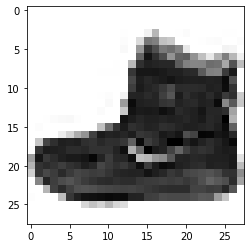

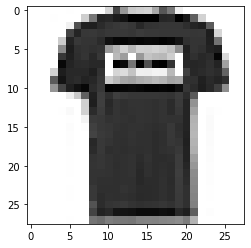

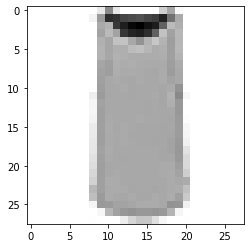

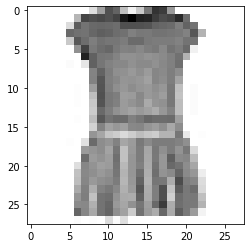

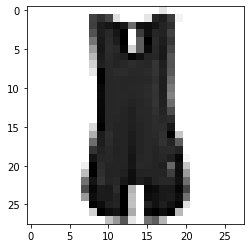

In [0]:
for i in range(5):
    plt.imshow(1-X_train[i][:, :, 0], cmap='gray')
    plt.show()

In [0]:
#first simple model
model =   Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding ='valid'),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(1024, activation='relu'),
        Dropout(0.25),
        Dense(num_classes, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

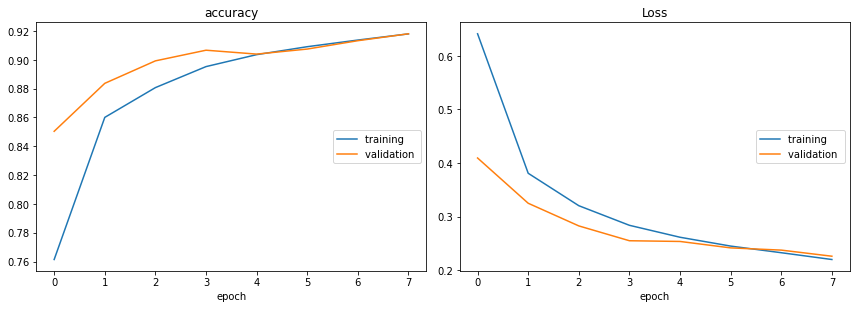

accuracy
	training         	 (min:    0.761, max:    0.918, cur:    0.918)
	validation       	 (min:    0.850, max:    0.918, cur:    0.918)
Loss
	training         	 (min:    0.220, max:    0.641, cur:    0.220)
	validation       	 (min:    0.226, max:    0.409, cur:    0.226)
235/235 [==============================] - 4s 17ms/step - loss: 0.2198 - accuracy: 0.9180 - val_loss: 0.2259 - val_accuracy: 0.9181


In [0]:
plot_losses = PlotLossesCallback()

history = model.fit(X_train, y_train,
  batch_size=256, epochs=8,
  verbose=1,
  callbacks=[plot_losses],
  validation_data=(X_test, y_test)
)

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.22795289754867554
Test accuracy: 0.9180999994277954
CNN Error: 8.19%


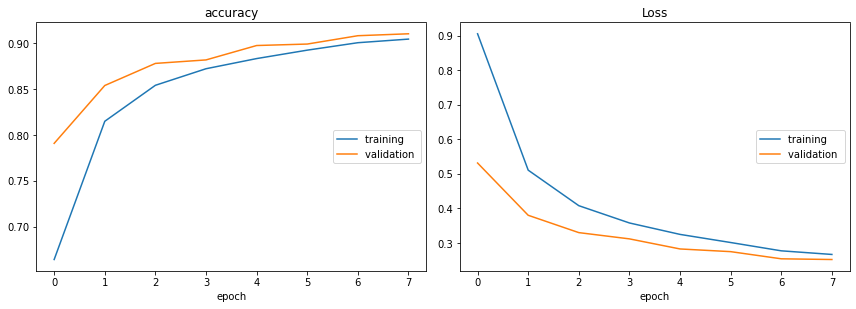

accuracy
	training         	 (min:    0.664, max:    0.905, cur:    0.905)
	validation       	 (min:    0.791, max:    0.910, cur:    0.910)
Loss
	training         	 (min:    0.267, max:    0.905, cur:    0.267)
	validation       	 (min:    0.252, max:    0.531, cur:    0.252)
235/235 [==============================] - 6s 24ms/step - loss: 0.2666 - accuracy: 0.9045 - val_loss: 0.2519 - val_accuracy: 0.9103
Test loss: 0.24688494205474854
Test accuracy: 0.9103000164031982
CNN Error: 8.97%
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
________________________

In [0]:
model =   Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding ='same'),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding ='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding ='same'),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

plot_losses = PlotLossesCallback()

history = model.fit(X_train, y_train,
  batch_size=256, epochs=8,
  verbose=1,
  callbacks=[plot_losses],
  validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))
print(model.summary())


In [8]:
!git config --global user.email 'kuband93@gmail.com'
!git config --global user.name "Jakub Andrzejewski"
!git add CNN_zalando_mnist.ipynb
!git commit -m "Creating CNN for zalando dataset - Test loss: ~0.24 Test accuracy: ~0.91 CNN Error: ~8.97%"
!git push -u origin master

fatal: pathspec 'CNN_zalando_mnist.ipynb' did not match any files
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
